In [16]:
import h5py
import librosa
import numpy as np

import keras
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.preprocessing import sequence
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Embedding
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.layers import Input, Flatten, Dropout, Activation
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.models import Model
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras import optimizers

file = h5py.File('dataset.h5', 'r')
#label_dict = {"['n']": 0, "['c']": 1, "['h']": 2, "['s']": 3,
 #             "['a']": 4, "['f']": 5, "['d']": 6, "['su']": 7}
#label_dict = {"[b'n']": 0, "[b'c']": 1, "[b'h']": 2, "[b'sa']": 3,
              #"[b'a']": 4, "[b'f']": 5, "[b'd']": 6, "[b'su']": 7}

In [12]:
#X_raw, y_raw = file['mel_spec'][:36406], file['label'][:36406]
#y = np.where(file['label']= !7 

             
labels = file['label'][:36406].squeeze()
relevant_indexes =  np.where(np.logical_and(labels != 6, labels != 7))
y = file['label'][relevant_indexes]
X = file['mel_spec'][relevant_indexes]


#X_test, y_test = file['mfcc'][], file['label'][]
y.shape

(28388, 1)

In [13]:
X.shape

(28388, 128, 42)

In [14]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

array([0], dtype=int64)

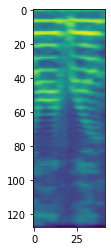

In [18]:
plt.imshow(X_train[6])
y_train[6]

In [25]:

model = Sequential()

model.add(tf.keras.layers.Reshape((128, 42, 1), input_shape=(128,42)))
model.add(Conv2D(128, (6,6),padding='same'))
model.add(Activation('relu'))
model.add(Dropout(0.1))
model.add(MaxPooling2D(2,2))

model.add(Conv2D(128, (3,3),padding='same',))
model.add(Activation('relu'))
model.add(MaxPooling2D(2,2))

model.add(Activation('relu'))
model.add(Dropout(0.1))

model.add(Flatten())
model.add(Dense(2048, activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(512, activation='sigmoid'))
#model.add(Dense(8, activation='softmax'))

#model = Sequential()
#model.add(tf.keras.layers.Reshape((12, 42, 1), input_shape=(12,42)))
#model.add(Conv2D(128, 5,padding='same',
                 #input_shape=(12,42)))
#model.add(Activation('relu'))
#model.add(Dropout(0.1))
#model.add(MaxPooling2D(pool_size=(8)))
#model.add(Conv2D(128, 5,padding='same',))
#model.add(Activation('relu'))
#model.add(Dropout(0.1))
#model.add(Flatten())
#model.add(Dense(8))
#model.add(Activation('softmax'))
opt = tf.keras.optimizers.RMSprop(learning_rate=0.001, rho=0.9, epsilon=None, decay=0.0)

In [26]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 reshape_1 (Reshape)         (None, 128, 42, 1)        0         
                                                                 
 conv2d_2 (Conv2D)           (None, 128, 42, 128)      4736      
                                                                 
 activation_3 (Activation)   (None, 128, 42, 128)      0         
                                                                 
 dropout_3 (Dropout)         (None, 128, 42, 128)      0         
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 64, 21, 128)      0         
 2D)                                                             
                                                                 
 conv2d_3 (Conv2D)           (None, 64, 21, 128)       147584    
                                                      

In [27]:
model.compile(loss='sparse_categorical_crossentropy',
              optimizer=opt,
              metrics=['accuracy'])

In [28]:
from keras.callbacks import EarlyStopping
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=15)

In [ ]:
cnnhistory=model.fit(X_train, y_train, batch_size=512, epochs=30,validation_data=(X_test, y_test), callbacks=[es], verbose=1)


Epoch 1/30
38/38 [==============================] - 592s 16s/step - loss: 2.0231 - accuracy: 0.2517 - val_loss: 2.1274 - val_accuracy: 0.2140
Epoch 2/30
38/38 [==============================] - 634s 17s/step - loss: 4.4893 - accuracy: 0.2651 - val_loss: 1.4732 - val_accuracy: 0.3465
Epoch 3/30
38/38 [==============================] - 614s 16s/step - loss: 2.4469 - accuracy: 0.3512 - val_loss: 2.0210 - val_accuracy: 0.3062
Epoch 4/30
38/38 [==============================] - 600s 16s/step - loss: 1.4394 - accuracy: 0.4034 - val_loss: 1.5985 - val_accuracy: 0.3350
Epoch 5/30
38/38 [==============================] - 652s 17s/step - loss: 1.4499 - accuracy: 0.4032 - val_loss: 1.3500 - val_accuracy: 0.4233
Epoch 6/30
38/38 [==============================] - 682s 18s/step - loss: 2.0292 - accuracy: 0.4163 - val_loss: 1.5387 - val_accuracy: 0.3816
Epoch 7/30
38/38 [==============================] - 674s 18s/step - loss: 1.2569 - accuracy: 0.4749 - val_loss: 1.2769 - val_accuracy: 0.4448
Epoch 

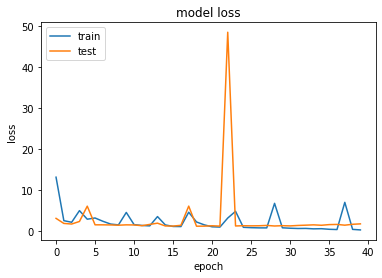

In [53]:
plt.plot(cnnhistory.history['loss'])
plt.plot(cnnhistory.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

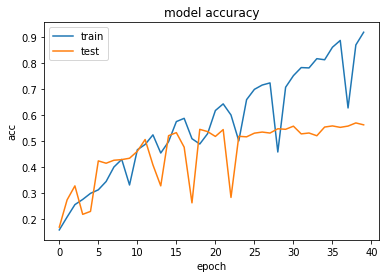

In [54]:
plt.plot(cnnhistory.history['accuracy'])
plt.plot(cnnhistory.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('acc')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [56]:
import os
model_name = 'Emotion_Voice_Detection_Model.h5'
save_dir = 'C:\\Users\\Admin\\Documents\\GitHub\\VocalEmotionSensor'
# Save model and weights
if not os.path.isdir(save_dir):
    os.makedirs(save_dir)
model_path = os.path.join(save_dir, model_name)
model.save(model_path)


Saved trained model at /content/drive/My Drive/Ravdess_model\Emotion_Voice_Detection_Model.h5 
